In this lesson, you have worked with some visualization techniques to get a grasp on plotting your data in preparation for clustering it. Scatterplots, in particular are useful for finding groups of objects. Research different ways and different libraries to create scatterplots and document your work in a notebook. You can use the data from this lesson, other lessons, or data you source yourself (please credit its source, however, in your notebook). Plot some data using scatterplots and explain what you discover.

I will work with the penguins' dataset that can be downloaded directly from the Seaborn library. This dataset contains data for three species of penguins, Adelie, Chinstrap, and Gentoo.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("penguins.csv")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [3]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [4]:
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Text(0.5, 1.0, 'species')

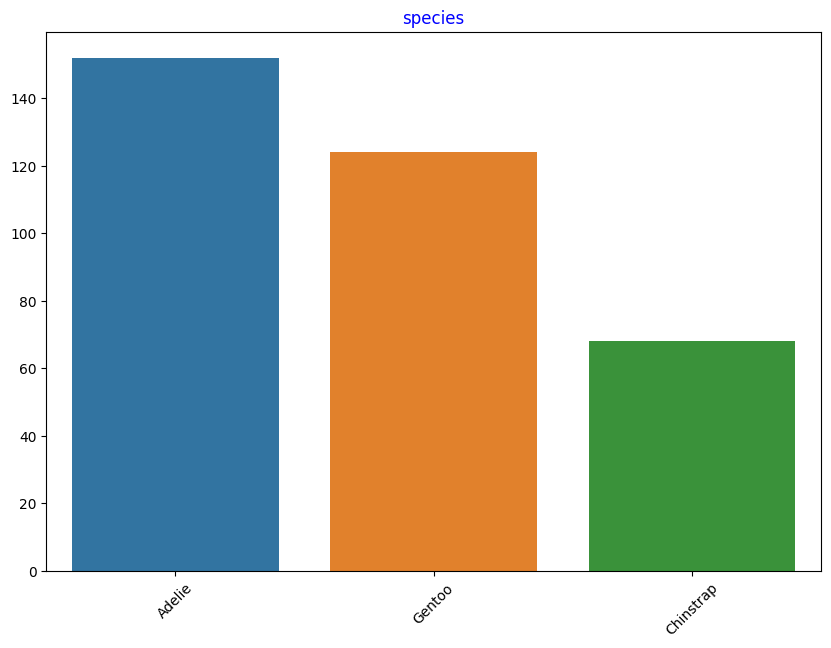

In [7]:
import seaborn as sns

top = df['species'].value_counts()
plt.figure(figsize=(10,7))
sns.barplot (x=top[:5].index,y=top[:5].values)
plt.xticks(rotation=45)
plt.title('species',color = 'blue')

C:\Users\User\AppData\Local\Temp\ipykernel_3628\3182244363.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


<Axes: >

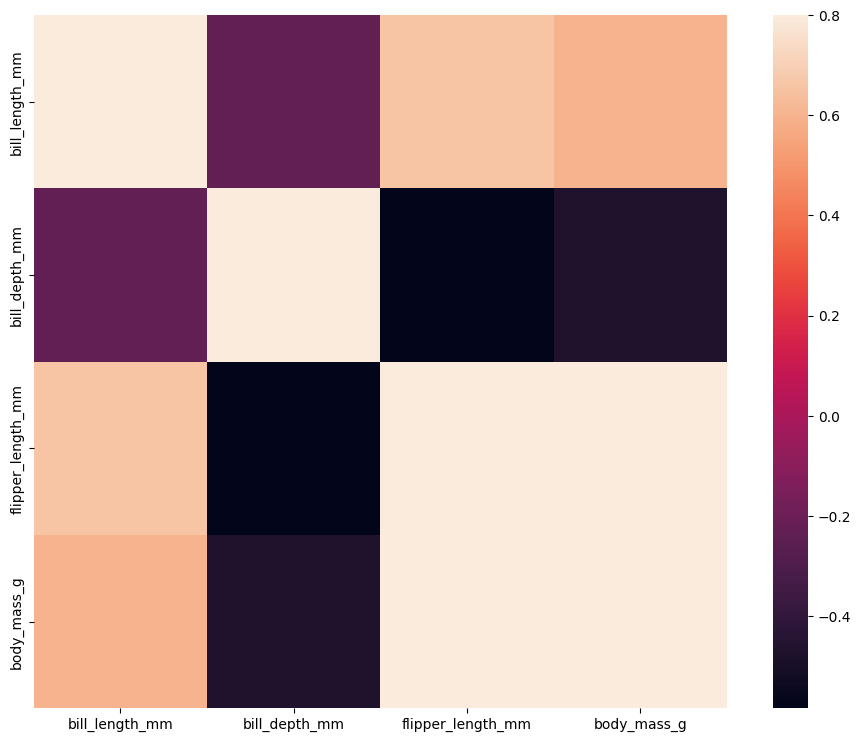

In [9]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True)

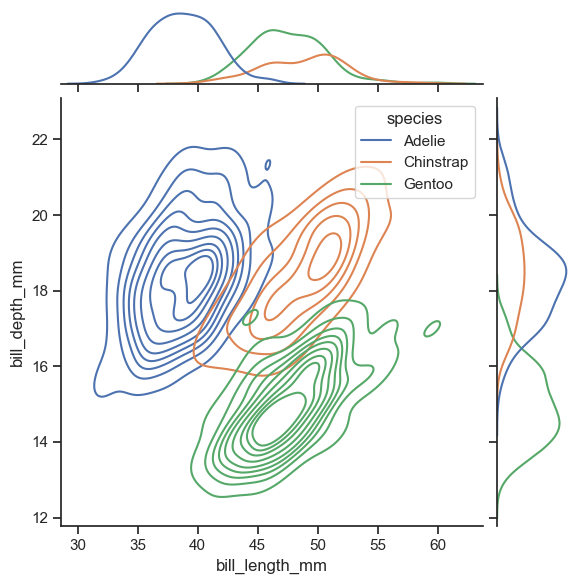

In [21]:
sns.set_theme(style="ticks")

g = sns.jointplot(
    data=df,
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    kind="kde",
)

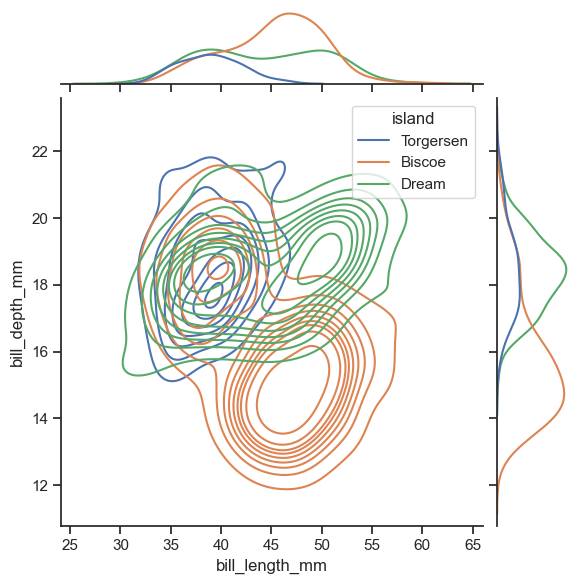

In [22]:
sns.set_theme(style="ticks")

g = sns.jointplot(
    data=df,
    x="bill_length_mm", y="bill_depth_mm", hue="island",
    kind="kde",
)

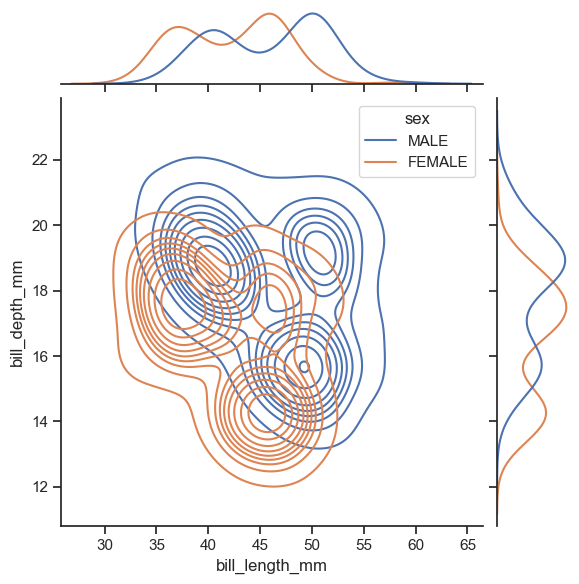

In [23]:
sns.set_theme(style="ticks")

g = sns.jointplot(
    data=df,
    x="bill_length_mm", y="bill_depth_mm", hue="sex",
    kind="kde",
)

C:\Users\User\AppData\Local\Temp\ipykernel_3628\36328267.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select.dropna(inplace=True)
c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


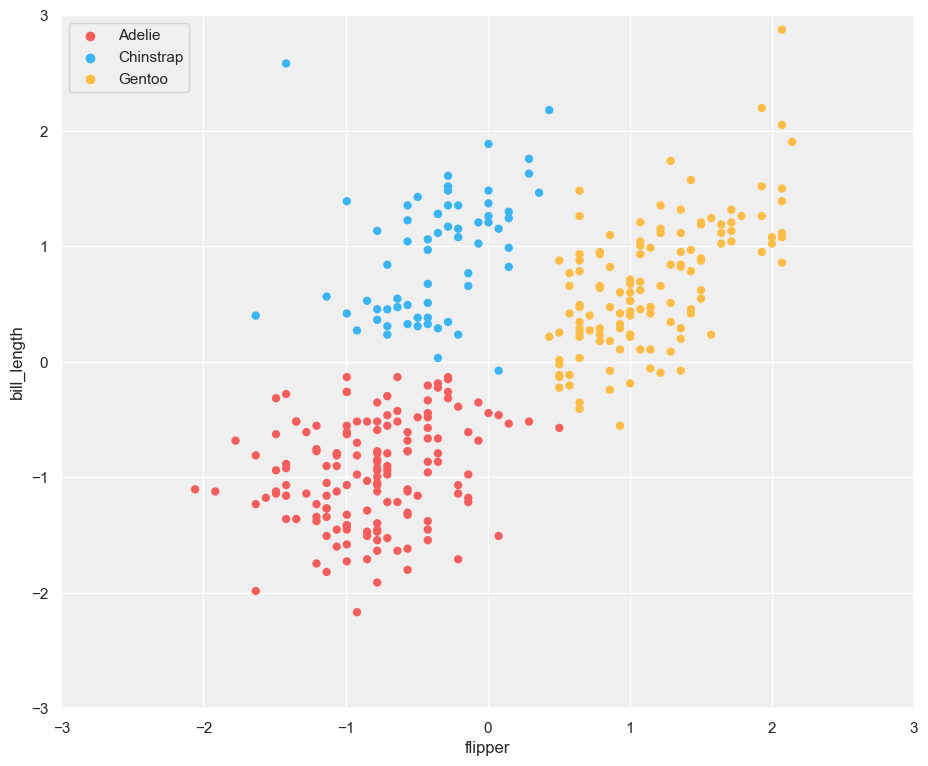

In [24]:
#select varibles for plotting
df_select = df[['flipper_length_mm', 'bill_length_mm', 'species']]

#remove missing values
df_select.dropna(inplace=True)

#sclae the values
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df_select.iloc[:,0:2]),
                      columns=['flipper', 'bill_length'])
#df_std.head()
label_dict = {0:'Adelie', 1:'Chinstrap', 2:'Gentoo'}

color_dict = {'Adelie':'#F65E5D',
              'Chinstrap':'#3AB4F2',
              'Gentoo':'#FFBC46'}

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=1000).fit(df_std[['flipper',
                                                                        'bill_length']])
df_std['cluster'] = kmeans.labels_
df_std['species_'] = [label_dict.get(i) for i in df_std.cluster]
df_std
sns.set(rc={'axes.facecolor':'EFEFEF'})
ax = plt.figure(figsize=(11,9))
ax = sns.scatterplot(data=df_std, x = 'flipper', y ='bill_length',
                     hue='species_',
                     palette=color_dict,
                     s=36, linewidth=0)
plt.legend(loc='upper left')
ax.set_xlim(-3,3)
ax.set_ylim(-3,3)
plt.savefig('scatter.png')
plt.show()